# Analysis of the risk of failure of the O-rings on the Challenger shuttle

## Data Analysis:

In [65]:
import numpy as np
import pandas as pd
data = pd.read_csv("shuttle.csv")
data

Date  Count  Temperature  Pressure  Malfunction
0    4/12/81      6           66        50            0
1   11/12/81      6           70        50            1
2    3/22/82      6           69        50            0
3   11/11/82      6           68        50            0
4    4/04/83      6           67        50            0
5    6/18/82      6           72        50            0
6    8/30/83      6           73       100            0
7   11/28/83      6           70       100            0
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
11  10/05/84      6           78       200            0
12  11/08/84      6           67       200            0
13   1/24/85      6           53       200            2
14   4/12/85      6           67       200            0
15   4/29/85      6           75       200            0
16   6/17/85      6           70       200            0
17   7/29/85      6           81       200            0
18   8/27/85      6           76       200            0
19  10/03/85      6           79       200            0
20  10/30/85      6           75       200            2
21  11/26/85      6           76       200            0
22   1/12/86      6           58       200            1

In [66]:
mal_data = data[data.Malfunction>0]
mal_data

Date  Count  Temperature  Pressure  Malfunction
1   11/12/81      6           70        50            1
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
13   1/24/85      6           53       200            2
20  10/30/85      6           75       200            2
22   1/12/86      6           58       200            1

We can see that there's some variability of temperature in case of a malfunction

In [67]:
func_data = data[data.Malfunction==0]
func_data

Date  Count  Temperature  Pressure  Malfunction
0    4/12/81      6           66        50            0
2    3/22/82      6           69        50            0
3   11/11/82      6           68        50            0
4    4/04/83      6           67        50            0
5    6/18/82      6           72        50            0
6    8/30/83      6           73       100            0
7   11/28/83      6           70       100            0
11  10/05/84      6           78       200            0
12  11/08/84      6           67       200            0
14   4/12/85      6           67       200            0
15   4/29/85      6           75       200            0
16   6/17/85      6           70       200            0
17   7/29/85      6           81       200            0
18   8/27/85      6           76       200            0
19  10/03/85      6           79       200            0
21  11/26/85      6           76       200            0

We can see that there's also a lot of variability of temperature when there's no malfunction

In [68]:
len(data[data.Malfunction>0])/len(data)

0.30434782608695654

We have about 30% of malfunctions in our dataset

## Visualizing the data

In [69]:
data["Frequency"]=data.Malfunction/data.Count
data

Date  Count  Temperature  Pressure  Malfunction  Frequency
0    4/12/81      6           66        50            0   0.000000
1   11/12/81      6           70        50            1   0.166667
2    3/22/82      6           69        50            0   0.000000
3   11/11/82      6           68        50            0   0.000000
4    4/04/83      6           67        50            0   0.000000
5    6/18/82      6           72        50            0   0.000000
6    8/30/83      6           73       100            0   0.000000
7   11/28/83      6           70       100            0   0.000000
8    2/03/84      6           57       200            1   0.166667
9    4/06/84      6           63       200            1   0.166667
10   8/30/84      6           70       200            1   0.166667
11  10/05/84      6           78       200            0   0.000000
12  11/08/84      6           67       200            0   0.000000
13   1/24/85      6           53       200            2   0.333333
14   4/12/85      6           67       200            0   0.000000
15   4/29/85      6           75       200            0   0.000000
16   6/17/85      6           70       200            0   0.000000
17   7/29/85      6           81       200            0   0.000000
18   8/27/85      6           76       200            0   0.000000
19  10/03/85      6           79       200            0   0.000000
20  10/30/85      6           75       200            2   0.333333
21  11/26/85      6           76       200            0   0.000000
22   1/12/86      6           58       200            1   0.166667

The proposed analysis assumes that flights with no acciddents do not provide relevant information, which is not necessarly true so we will try to use the data on experiments with no accidents as well in our analysis

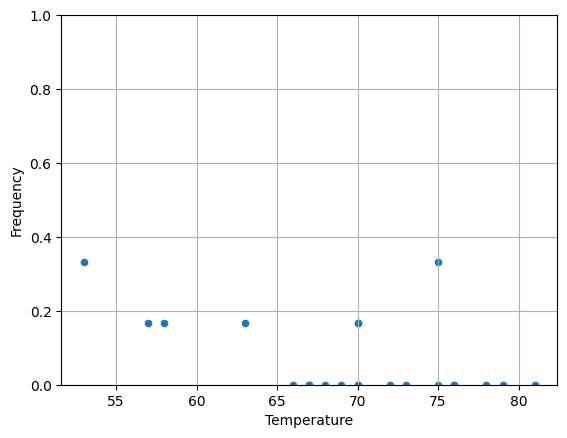

In [70]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

From this plot we can see that all experiments with no malfunctions were done in temperatures above 65F, which might suggest a link between malfunctions and the temperature.

We will try to see if we can see a link between Pressure and malfunctions:

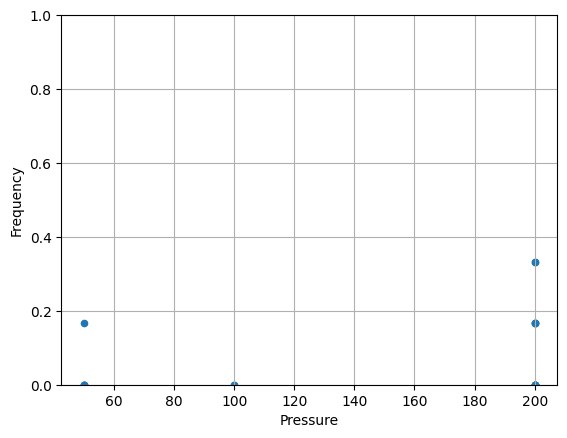

In [71]:
data.plot(x="Pressure",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

We can see from this plot that there's no pattern in this plot which suggests that there's no link between pressure and malfunctions

## Estimation of temperature influence

In [74]:
import statsmodels.api as sm

data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept', 'Temperature']], family=sm.families.Binomial()).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Thu, 27 Oct 2022   Deviance:                       3.0144
Time:                        18:32:32   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

We have a coefficient of -0.11 of temperature which is pretty significant and suggests a negative correlation between the temperature and malfunctions.

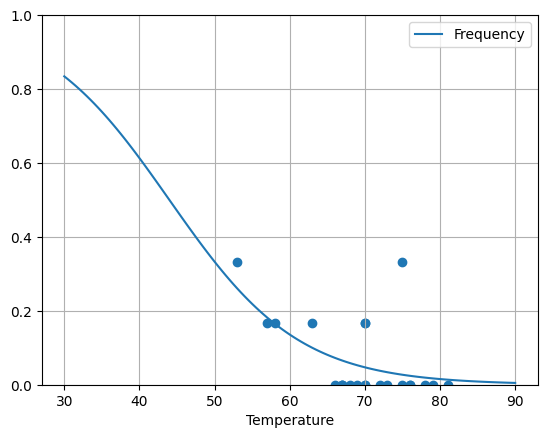

In [63]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept', 'Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

As expected there's a correlation between the temperature and the number of malfunctions, and we can see more clearly that the lower the temperature the higher the chances of a malfunction.

We will try to test this result on the initial dataset:

In [56]:
print(np.sum(data.Malfunction)/np.sum(data.Count))

0.06521739130434782


If we estimate the probability of failure over the whole dataset we get just 0.06.

In [57]:
print(np.sum(data[data["Temperature"] < 60].Malfunction)/np.sum(data[data["Temperature"] < 60].Count))

0.2222222222222222


But if we compute the conditional probability of malfucntion in low temperatures, we get 22% which is pretty significant

In [58]:
print(np.sum(data[data["Temperature"] >= 60].Malfunction)/np.sum(data[data["Temperature"] >= 60].Count))

0.041666666666666664


Here we can see that the probability of malfunction in higher temperatures is just 4% which very low.

This huge difference between the probability of malfunctions in low and high temperatures suggests that the temperature impacts the chances of having a malfunction.

## Conclusion

We can conclude from these results that the mistake that was done in the given analysis is the omission of relevant data which is here the number of malfunctions in higher temperatures.